In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import copy
import os
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
from warnings import filterwarnings
filterwarnings("ignore")
from IPython.display import Image

In [2]:
df=pd.read_csv("C:/Users/Rajashri/Downloads/Wholesale Customer.csv")
df.head(5)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [3]:
print("From the above table we can find out :")
print("-There are two different channels Hotel and Retail which are having three different Regions-Lisbon, Oporto and Other.")
print("-They are having 6 different varieties of products i.e.Fresh,Milk,Grocery,Frozen,Detergents_Paper & Delicatessen.")

From the above table we can find out :
-There are two different channels Hotel and Retail which are having three different Regions-Lisbon, Oporto and Other.
-They are having 6 different varieties of products i.e.Fresh,Milk,Grocery,Frozen,Detergents_Paper & Delicatessen.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [5]:
# Answer for question 1.1-Use methods of descriptive statistics to summarize data.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [6]:
print("Obersvation:")
print("Basis on describe function we can find out standrad deviation, mean, max value, min value , 1st quartile(25%),")
print("2nd quartile(50%) and 3rd quartile(75%). We can also calculate range from max & min value.")

Obersvation:
Basis on describe function we can find out standrad deviation, mean, max value, min value , 1st quartile(25%),
2nd quartile(50%) and 3rd quartile(75%). We can also calculate range from max & min value.


In [7]:
#Dropping out Buyer/Spender column to avoid confusion.
df4=copy.deepcopy(df)
del df4['Buyer/Spender']
df4.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [8]:
#Created new column'Total' for sum of all products
df5 = copy.deepcopy(df4)
df5['Total'] =df4['Fresh']+df4['Milk']+df4['Grocery']+df4['Frozen']+df4['Detergents_Paper']+df4['Delicatessen']
df5.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [9]:
#Channel Count
df5['Channel'].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [10]:
#Region Count
df5['Region'].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [11]:
region = df5.groupby('Region')['Total'].sum()
region

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total, dtype: int64

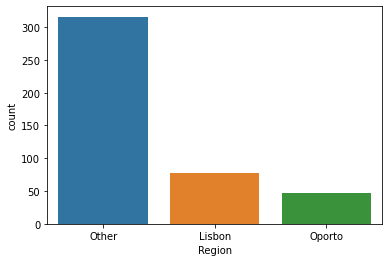

Observations:
Other regions spending amount is $10677599 which is highest spend and,
Oporto region spending amount is $1555088 which is least spend.


In [12]:
# Answer for Regionwise Most & least spend
sns.countplot(df5['Region'])
plt.show()
print("Observations:")
print("Other regions spending amount is $10677599 which is highest spend and,")
print("Oporto region spending amount is $1555088 which is least spend.")

In [13]:
channel = df5.groupby('Channel')['Total'].sum()
channel

Channel
Hotel     7999569
Retail    6619931
Name: Total, dtype: int64

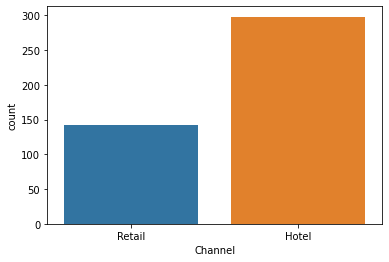

Observations:
Hotel channel spending $7999569 which is highest spend and,
Retail channel spending amount is $6619931 which is least spend.


In [14]:
# Answer for Channel Most & least spend
sns.countplot(df5['Channel'])
plt.show()
print("Observations:")
print("Hotel channel spending $7999569 which is highest spend and,")
print("Retail channel spending amount is $6619931 which is least spend.")

In [15]:
# Answer for Combination of Region & Channel
region_channel = df5.groupby(['Region','Channel'])['Total'].sum()
print(region_channel)
print('')
print("Observation :")
print("Basis on above data we can see that, maximum amount spent on 'Hotel' Channel and 'Other' Region.")
print("minimum amount spent on 'Hotel' Channel and 'Oporto' Region.")

Region  Channel
Lisbon  Hotel      1538342
        Retail      848471
Oporto  Hotel       719150
        Retail      835938
Other   Hotel      5742077
        Retail     4935522
Name: Total, dtype: int64

Observation :
Basis on above data we can see that, maximum amount spent on 'Hotel' Channel and 'Other' Region.
minimum amount spent on 'Hotel' Channel and 'Oporto' Region.


In [16]:
# Answer for 1.2 question - There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel?
Freshpivot=pd.pivot_table(data=df5,index=['Channel'],columns=['Region'],values=['Fresh'],aggfunc=['sum'])
Freshpivot

sum                 
          Fresh                 
Region   Lisbon  Oporto    Other
Channel                         
Hotel    761233  326215  2928269
Retail    93600  138506  1032308

In [17]:
Milkpivot=pd.pivot_table(data=df5,index=['Channel'],columns=['Region'],values=['Milk'],aggfunc=['sum'])
Milkpivot

sum                 
           Milk                 
Region   Lisbon  Oporto    Other
Channel                         
Hotel    228342   64519   735753
Retail   194112  174625  1153006

In [18]:
Frozenpivot=pd.pivot_table(data=df5,index=['Channel'],columns=['Region'],values=['Frozen'],aggfunc=['sum'])
Frozenpivot

sum                
         Frozen                
Region   Lisbon  Oporto   Other
Channel                        
Hotel    184512  160861  771606
Retail    46514   29271  158886

In [19]:
Grocerypivot=pd.pivot_table(data=df5,index=['Channel'],columns=['Region'],values=['Grocery'],aggfunc=['sum'])
Grocerypivot

sum                 
        Grocery                 
Region   Lisbon  Oporto    Other
Channel                         
Hotel    237542  123074   820101
Retail   332495  310200  1675150

In [20]:
DetergentsPaperpivot=pd.pivot_table(data=df5,index=['Channel'],columns=['Region'],values=['Detergents_Paper'],aggfunc=['sum'])
DetergentsPaperpivot

sum                
        Detergents_Paper                
Region            Lisbon  Oporto   Other
Channel                                 
Hotel              56081   13516  165990
Retail            148055  159795  724420

In [21]:
Delicatessenpivot=pd.pivot_table(data=df5,index=['Channel'],columns=['Region'],values=['Delicatessen'],aggfunc=['sum'])
Delicatessenpivot

sum               
        Delicatessen               
Region        Lisbon Oporto   Other
Channel                            
Hotel          70632  30965  320358
Retail         33695  23541  191752

Text(0.5, 1.0, 'Fresh')

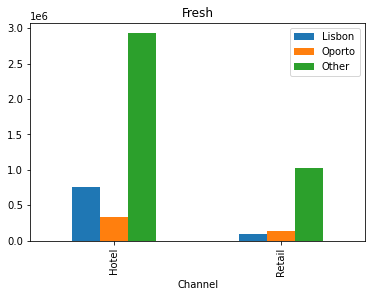

In [22]:
Freshpivot.plot(kind='bar')
plt.legend(['Lisbon','Oporto','Other'])
plt.title('Fresh')

Text(0.5, 1.0, 'Milk')

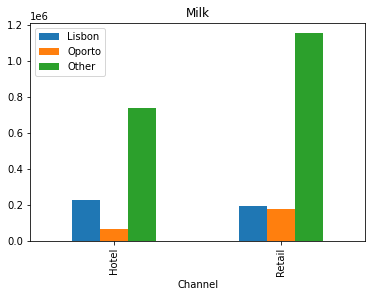

In [23]:
Milkpivot.plot(kind='bar')
plt.legend(['Lisbon','Oporto','Other'])
plt.title('Milk')

Text(0.5, 1.0, 'Frozen')

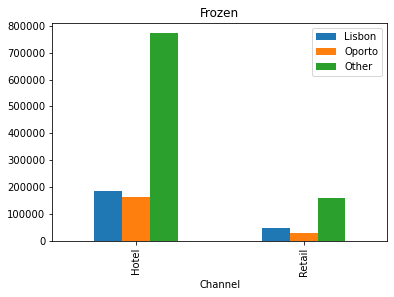

In [24]:
Frozenpivot.plot(kind='bar')
plt.legend(['Lisbon','Oporto','Other'])
plt.title('Frozen')

Text(0.5, 1.0, 'Grocery')

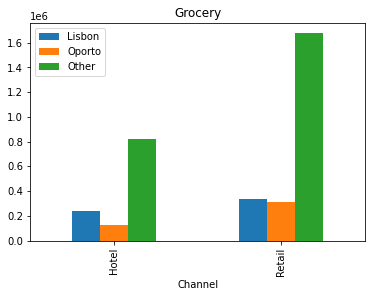

In [25]:
Grocerypivot.plot(kind='bar')
plt.legend(['Lisbon','Oporto','Other'])
plt.title('Grocery')

Text(0.5, 1.0, 'Detergents_Paper')

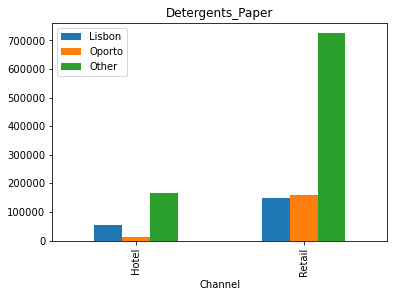

In [26]:
DetergentsPaperpivot.plot(kind='bar')
plt.legend(['Lisbon','Oporto','Other'])
plt.title('Detergents_Paper')

Text(0.5, 1.0, 'Delicatessen')

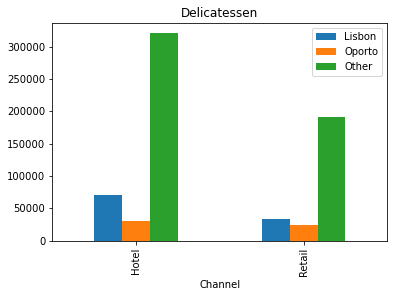

In [27]:
Delicatessenpivot.plot(kind='bar')
plt.legend(['Lisbon','Oporto','Other'])
plt.title('Delicatessen')

In [28]:
print("Basis on above barplots we can find out below observations:")
print("1.On 'Fresh' item, Hotel channel spends highest amount in Other Region. Very less amount has spent in Lisbon region and Retail Channel.")
print("2.On 'Milk’ item, Other region spends more amount comparatively Lisbon & Oporto.Oporto region spends very less amount in Hotel channel for Milk item.")
print("3.Frozen variety have higher spent in Other region for Hotel channel. Oporto region spends very less amount in Retail channel")
print("for Frozen item.")
print("4.Grocery variety have highest spent in Retail channel and Other Region. Oporto region spends lesser amount")
print("in Hotel channel for Grocery.")
print("5.Detergents_Paper variety having higher spend in Other Region and Retail channel. Very less amount spent on Detergents_Paper")
print("in Oporto region and Hotel channel.")
print("6.On Delicatessen item, Hotel channel spends highest amount in Other region. Less amount has spent on Delicatessen item for")
print("both Hotel and Retail channel in Oporto Region.")

Basis on above barplots we can find out below observations:
1.On 'Fresh' item, Hotel channel spends highest amount in Other Region. Very less amount has spent in Lisbon region and Retail Channel.
2.On 'Milk’ item, Other region spends more amount comparatively Lisbon & Oporto.Oporto region spends very less amount in Hotel channel for Milk item.
3.Frozen variety have higher spent in Other region for Hotel channel. Oporto region spends very less amount in Retail channel
for Frozen item.
4.Grocery variety have highest spent in Retail channel and Other Region. Oporto region spends lesser amount
in Hotel channel for Grocery.
5.Detergents_Paper variety having higher spend in Other Region and Retail channel. Very less amount spent on Detergents_Paper
in Oporto region and Hotel channel.
6.On Delicatessen item, Hotel channel spends highest amount in Other region. Less amount has spent on Delicatessen item for
both Hotel and Retail channel in Oporto Region.


In [29]:
#Code & Answer for question 1.3 - On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?
df4.skew().round(2)

Fresh                2.56
Milk                 4.05
Grocery              3.59
Frozen               5.91
Detergents_Paper     3.63
Delicatessen        11.15
dtype: float64

In [30]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [31]:
print("Basis on Skewness and describe function, we can find out below details for each variety of product:")
print('')
print("* Fresh item has (Mean is 12000.297727, Standard Deviation is 12647.328865 with min value 3 and max value is 112151.0.")
print("also, values for Q1(25% is 3127.75), Q2 (50% is 3627.0) & Q3 (75% is 16933.75).")
print("IQR is Q3-Q1 =",16933.75-3127.75, "and Range=", 112151-3)
print('')
print("* Milk item has (Mean is 5796.265909, Standard Deviation is 7380.377175 with min value 55 and max value is 73498.0.")
print("also, values for Q1(25% is 1533.00), Q2 (50% is 8504.0) & Q3 (75% is 7190.25).")
print("IQR is Q3-Q1 =",7190.25-1533.0, "and Range=",73498.0-55.0)
print('')
print("* Grocery item has (Mean is 7951.277273, Standard Deviation is 9503.162829 with min value 3 and max value is 92780.0.")
print("also, values for Q1(25% is 2153.00), Q2 (50% is 4755.5) & Q3 (75% is 10655.75).")
print("IQR is Q3-Q1 =",10655.75-2153.00, "and Range=",92780.0-3.0)
print('')
print("* Frozen item has (Mean is 3071.931818, Standard Deviation is 4854.673333 with min value 25 and max value is 60869.0.")
print("also, values for Q1(25% is 742.25), Q2 (50% is 1526.0) & Q3 (75% is 3554.25).")
print("IQR is Q3-Q1 =",3554.25-742.25, "and Range=",60869.0-25.0)
print('')
print("* Detergents_Paper item has (Mean is 2881.493182, Standard Deviation is 4767.854448 with min value 3 and max value is 40827.0.")
print("also, values for Q1(25% is 256.75), Q2 (50% is 816.5) & Q3 (75% is 3922.00).")
print("IQR is Q3-Q1 =",3922.00-256.75, "and Range=",40827.0-3.0)
print('')
print("* Delicatessen item has (Mean is 1524.870455, Standard Deviation is 2820.105937 with min value 3 and max value is 47943.0.")
print("also, values for Q1(25% is 408.25), Q2 (50% is 965.5) & Q3 (75% is 1820.25).")
print("IQR is Q3-Q1 =",1820.25-408.25, "and Range=",47943.0-3.0)
print('')
print("Coefficient of Variation for Fresh is",round(12647.328865/12000.297727,ndigits=2))
print("Coefficient of Variation for Milk is",round(7380.377175/5796.265909,ndigits=2))
print("Coefficient of Variation for Grocery is",round(9503.162829/7951.277273,ndigits=2))
print("Coefficient of Variation for Frozen is",round(4854.673333/3071.931818,ndigits=2))
print("Coefficient of Variation for Detergents_Paper is",round(4767.854448/2881.493182,ndigits=2))
print("Coefficient of Variation for Delicatessen is",round(2820.105937/1524.870455,ndigits=2))
print('')
print("Final Outcome :")
print("Using Coefficient of Variation we can find out the least value for Category “Fresh” is (1.05) and")
print("highest value for Category “Delicatessen” is (1.84).")
print("Hence, from the given data it is clear that the most inconsistent behaviour shown by item – Delicatessen")
print("And least inconsistent behaviour shown by item – Fresh.")

Basis on Skewness and describe function, we can find out below details for each variety of product:

* Fresh item has (Mean is 12000.297727, Standard Deviation is 12647.328865 with min value 3 and max value is 112151.0.
also, values for Q1(25% is 3127.75), Q2 (50% is 3627.0) & Q3 (75% is 16933.75).
IQR is Q3-Q1 = 13806.0 and Range= 112148

* Milk item has (Mean is 5796.265909, Standard Deviation is 7380.377175 with min value 55 and max value is 73498.0.
also, values for Q1(25% is 1533.00), Q2 (50% is 8504.0) & Q3 (75% is 7190.25).
IQR is Q3-Q1 = 5657.25 and Range= 73443.0

* Grocery item has (Mean is 7951.277273, Standard Deviation is 9503.162829 with min value 3 and max value is 92780.0.
also, values for Q1(25% is 2153.00), Q2 (50% is 4755.5) & Q3 (75% is 10655.75).
IQR is Q3-Q1 = 8502.75 and Range= 92777.0

* Frozen item has (Mean is 3071.931818, Standard Deviation is 4854.673333 with min value 25 and max value is 60869.0.
also, values for Q1(25% is 742.25), Q2 (50% is 1526.0) & Q3 (

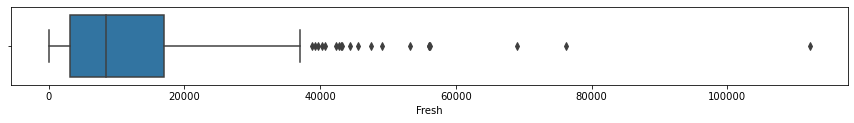

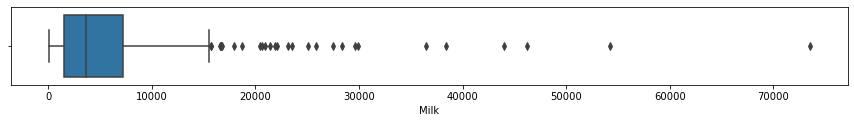

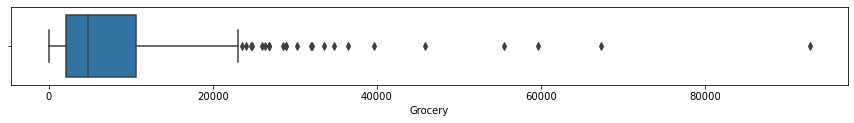

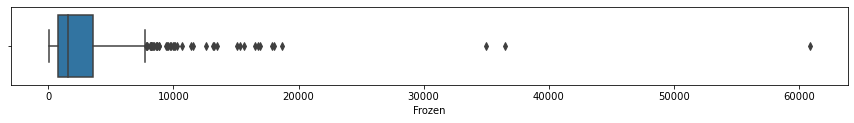

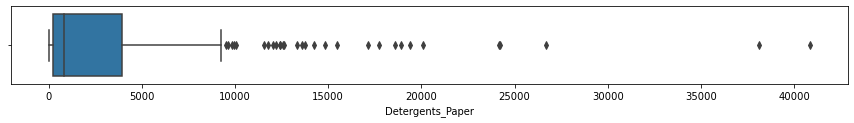

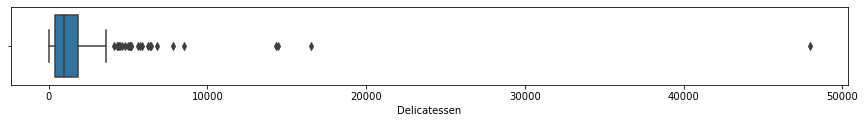


Observation :
Basis on above boxplots we can find out that each category(Fresh,Milk,Grocery,Frozen,Detergents_Paper & Delicatessen)
having an outliers.


In [32]:
# Code for question 1.4 -Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments
plt.figure(figsize=(15,10))
plt.subplot(6,1,1)
sns.boxplot(df4['Fresh'])

plt.figure(figsize=(15,10))
plt.subplot(6,1,2)
sns.boxplot(df4['Milk'])

plt.figure(figsize=(15,10))
plt.subplot(6,1,3)
sns.boxplot(df4['Grocery'])

plt.figure(figsize=(15,10))
plt.subplot(6,1,4)
sns.boxplot(df4['Frozen'])

plt.figure(figsize=(15,10))
plt.subplot(6,1,5)
sns.boxplot(df4['Detergents_Paper'])

plt.figure(figsize=(15,10))
plt.subplot(6,1,6)
sns.boxplot(df4['Delicatessen'])
plt.show()

print('')
print("Observation :")
print("Basis on above boxplots we can find out that each category(Fresh,Milk,Grocery,Frozen,Detergents_Paper & Delicatessen)")
print("having an outliers.")

In [33]:
# Answer for question-1.5 - On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective
print("-As per the analysis, We can find out from (Calculation of CV) that there are inconsistencies in spending of different items,")
print("which needs to be minimized.")
print("-The spending of Hotel and Retail channel are different which should be more or less equal.")
print("-Spent should equal for different regions.")
print("-Need to find out the reasons and focus on that as to why there is inconsistency in Delicatessen variety.")
print("-Apart from item 'Fresh' we can focus on other items so that we can minimize the inconsistency and can increase spent of other varieties along with different regions.")
print("-We can focus on item 'Detergents_Paper' as why they are having very less spending in Hotel Channel.")

-As per the analysis, We can find out from (Calculation of CV) that there are inconsistencies in spending of different items,
which needs to be minimized.
-The spending of Hotel and Retail channel are different which should be more or less equal.
-Spent should equal for different regions.
-Need to find out the reasons and focus on that as to why there is inconsistency in Delicatessen variety.
-Apart from item 'Fresh' we can focus on other items so that we can minimize the inconsistency and can increase spent of other varieties along with different regions.
-We can focus on item 'Detergents_Paper' as why they are having very less spending in Hotel Channel.


In [34]:
#("STARTING NEXT QUESTION WHICH IS - PROBLEM 2 - Answers")

In [35]:
df1=pd.read_csv("C:/Users/Rajashri/Downloads/Survey-1.csv")
df1.head(5)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [36]:
#Answer for 2.1.1. Gender and Major
print("2.1.1-contingency table for Gender & Major-")
GM=pd.crosstab(df1["Gender"],df1["Major"])
GM

2.1.1-contingency table for Gender & Major-


Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [37]:
#Answer for 2.1.2. Gender and Grad Intention
print("2.1.2-contingency table for Gender & Grad Intention-")
GGI=pd.crosstab(df1["Gender"],df1["Grad Intention"])
GGI

2.1.2-contingency table for Gender & Grad Intention-


Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [38]:
#Answer for 2.1.3. Gender and Employment
print("2.1.3-contingency table for Gender & Employment-")
GE=pd.crosstab(df1["Gender"],df1["Employment"])
GE

2.1.3-contingency table for Gender & Employment-


Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [39]:
#Answer for 2.1.4. Gender and Computer
print("2.1.4-contingency table for Gender & Computer-")
GC=pd.crosstab(df1["Gender"],df1["Computer"])
GC

2.1.4-contingency table for Gender & Computer-


Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [40]:
#Answer for 2.2.1. What is the probability that a randomly selected CMSU student will be male?
print(df1['Gender'].value_counts())
print('')
print("Probability of randomly selected CMSU Male student is", round(29/(29+33)*100,ndigits=2))

Female    33
Male      29
Name: Gender, dtype: int64

Probability of randomly selected CMSU Male student is 46.77


In [41]:
# Answer for 2.2.2. What is the probability that a randomly selected CMSU student will be female?
print(df1['Gender'].value_counts())
print('')
print("Probability of randomly selected CMSU Female student is", round(33/(33+29)*100,ndigits=2))

Female    33
Male      29
Name: Gender, dtype: int64

Probability of randomly selected CMSU Female student is 53.23


In [42]:
# Answer for 2.3.1 Find the conditional probability of different majors among the male students in CMSU
GM=pd.crosstab(df1["Gender"],df1["Major"])
GM

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [43]:
# Answer for 2.3.1 Find the conditional probability of different majors among the male students in CMSU
print('For MALE candidates:')
print('Probability of Accounting :',round(4/29*100,ndigits=2))
print('Probability of CIS :',round(1/29*100,ndigits=2))
print('Probability of Economics/Finance :', round(4/29*100,ndigits=2))
print('Probability of International Business:', round(2/29*100, ndigits=2))
print('Probability of Management:',round(6/29*100, ndigits=2))
print('Probability of Other:',round(4/29*100,ndigits=2))
print('Probability of Retailing/Marketing:',round(5/29*100,ndigits=2))
print('Probability of Undecided:',round(3/29*100,ndigits=2))
print('')
print("Observation :")
print("Basis on above results we can identify that most of the male students have selected Management major(20.69%)")
print("and least selected major is CIS(3.45%)")

For MALE candidates:
Probability of Accounting : 13.79
Probability of CIS : 3.45
Probability of Economics/Finance : 13.79
Probability of International Business: 6.9
Probability of Management: 20.69
Probability of Other: 13.79
Probability of Retailing/Marketing: 17.24
Probability of Undecided: 10.34

Observation :
Basis on above results we can identify that most of the male students have selected Management major(20.69%)
and least selected major is CIS(3.45%)


In [44]:
# Answer for 2.3.2 Find the conditional probability of different majors among the female students in CMSU
GM=pd.crosstab(df1["Gender"],df1["Major"])
GM

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [45]:
print('For FEMALE candidates:')
print('Probability of Accounting :',round(3/33*100,ndigits=2))
print('Probability of CIS :',round(3/33*100,ndigits=2))
print('Probability of Economics/Finance :',round(7/33*100,ndigits=2))
print('Probability of International Business:',round(4/33*100,ndigits=2))
print('Probability of Management:',round(4/33*100,ndigits=2))
print('Probability of Other:',round(3/33*100,ndigits=2))
print('Probability of Retailing/Marketing:',round(9/33*100,ndigits=2))
print('Probability of Undecided:',round(0/33*100,ndigits=2))
print('')
print("Observation :")
print("Basis on above results we can identify that most of the female students have selected Retailing/Marketing major(27.27%)")
print("and there is no any undecided major(0%) within female students.")

For FEMALE candidates:
Probability of Accounting : 9.09
Probability of CIS : 9.09
Probability of Economics/Finance : 21.21
Probability of International Business: 12.12
Probability of Management: 12.12
Probability of Other: 9.09
Probability of Retailing/Marketing: 27.27
Probability of Undecided: 0.0

Observation :
Basis on above results we can identify that most of the female students have selected Retailing/Marketing major(27.27%)
and there is no any undecided major(0%) within female students.


In [46]:
#Answer for 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.
GGI=pd.crosstab(df1["Gender"],df1["Grad Intention"])
GGI

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [47]:
print("Probability of a randomly chosen male students and intends to graduate is ",round((17/29) * 100,ndigits=2))

Probability of a randomly chosen male students and intends to graduate is  58.62


In [48]:
#Answer for 2.4.2. Find the probability that a randomly selected student is a female and does NOT have a laptop
GC=pd.crosstab(df1["Gender"],df1["Computer"])
GC

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [49]:
print("Total number of female who are having laptop = 29")
print("Total number of students who all are having laptop =", 29+26)
print("Probability of randomly selected student is a female and does not have a laptop=",round(1-(29/55),ndigits=2))

Total number of female who are having laptop = 29
Total number of students who all are having laptop = 55
Probability of randomly selected student is a female and does not have a laptop= 0.47


In [50]:
# Answer for 2.5.1 Find the probability that a randomly chosen student is a male or has a full-time employment
GE=pd.crosstab(df1["Gender"],df1["Employment"])
GE

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [51]:
print("Probability of randomly chosen male students is",round(29/62*100,ndigits=2))
print("Probability of students with full time employment is",round(10/62*100,ndigits=2))
print("Probability of male students with full time employment is",round(7/62*100,ndigits=2))
print("Probability of randomly chosen student is a male or who has a full time employment is",round(29/62*100+10/62*100-7/62*100,ndigits=2))

Probability of randomly chosen male students is 46.77
Probability of students with full time employment is 16.13
Probability of male students with full time employment is 11.29
Probability of randomly chosen student is a male or who has a full time employment is 51.61


In [52]:
# Answer for 2.5.2 Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.
GM=pd.crosstab(df1["Gender"],df1["Major"])
GM

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [53]:
print("Probability of female who have chosen International business is",round(4/33*100,ndigits=2))
print("Probability of female who have chosen Management is",round(4/33*100,ndigits=2))
print("Probability that given female student who is majoring in international business or management is",round(4/33*100+4/33*100,ndigits=2))

Probability of female who have chosen International business is 12.12
Probability of female who have chosen Management is 12.12
Probability that given female student who is majoring in international business or management is 24.24


In [54]:
# Answer for 2.6 - Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?
GGI=pd.crosstab(df1["Gender"],df1["Grad Intention"])
GGI.drop(labels='Undecided',axis=1)

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [55]:
#Image(filename='C:/Users/Rajashri/Downloads/NewData.jpg',width=300,height=300)

In [56]:
# Half Answer for 2.6 - Do you think graduate intention and being female are independent events ?
print("Probability of graduate intention yes is",28/40)
print("Probability of given female",20/40)
print("Probability of graduate intention times probability of female=",28/40*20/40)
print("Probability for graduate intention and being female is",11/40)
print("Basis on results we can find out both probabilities are not equal hence these are not independant events.")

Probability of graduate intention yes is 0.7
Probability of given female 0.5
Probability of graduate intention times probability of female= 0.35
Probability for graduate intention and being female is 0.275
Basis on results we can find out both probabilities are not equal hence these are not independant events.


In [57]:
#Answer for 2.7.1 If a student is chosen randomly, what is the probability that his/her GPA is less than 3
A=pd.crosstab(df1["Gender"],df1["GPA"])
A

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9
Gender,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0


In [58]:
print("Number of male students whose GPA is less than 3 =",9 )
print("Number of female students whose GPA is less than 3 =",8)
print("Probability that if a student is chosen randomly his/her GPA<3 is",17/62*100)

Number of male students whose GPA is less than 3 = 9
Number of female students whose GPA is less than 3 = 8
Probability that if a student is chosen randomly his/her GPA<3 is 27.419354838709676


In [59]:
#Answer for 2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.
GS=pd.crosstab(df1["Gender"],df1["Salary"])
GS

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0
Gender,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1


In [60]:
print("Conditional Probability that a randomly selected male earns 50 or more is",round(14/29*100,ndigits=2))
print("Conditional Probability that a randomly selected female earns 50 or more is",round(18/33*100, ndigits=2))

Conditional Probability that a randomly selected male earns 50 or more is 48.28
Conditional Probability that a randomly selected female earns 50 or more is 54.55


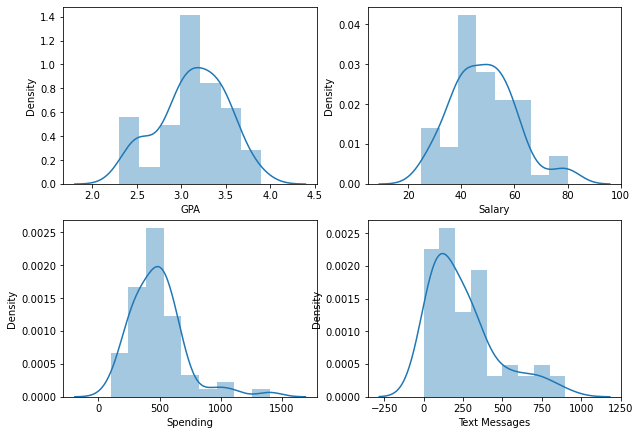

Final Outcome:
1.GPA- For this variable the curve does not look like a normal curve. There are some irregularities in the values on the right side of the curve.
2.2.Salary-For this variable the curve almost looks like a normal looking curve but this curve has a plateau on the top and there are some irregular values on the left.
3.Spending-This is right skewed curve with a tail on left side.
4.Text Messages-This is right skewed curve with a long-left tail.
Hence, we can say that Spending & Text Messages are not following normal distribution.


In [61]:
#Answer for 2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.
fig=plt.figure(figsize=(10,15))
plt.subplot(4,2,1)
sns.distplot(df1['GPA'])

plt.subplot(4,2,2)
sns.distplot(df1['Salary'])

plt.subplot(4,2,3)
sns.distplot(df1['Spending'])

plt.subplot(4,2,4)
sns.distplot(df1['Text Messages'])
plt.show()

print("Final Outcome:")
print("1.GPA- For this variable the curve does not look like a normal curve. There are some irregularities in the values on the right side of the curve.")
print("2.2.Salary-For this variable the curve almost looks like a normal looking curve but this curve has a plateau on the top and there are some irregular values on the left.")
print("3.Spending-This is right skewed curve with a tail on left side.")
print("4.Text Messages-This is right skewed curve with a long-left tail.")
print("Hence, we can say that Spending & Text Messages are not following normal distribution.")

In [62]:
#Answer 2.8.2 Write a note summarizing your conclusions
print("Basis on above analysis we can find out that Female students count is high than male who attended CMSU survey.")
print("There are 8 different varieties of Major’s attended by students. We can find that 20.69% of male students have selected")
print("Management Major and 27.27% of Female students selected Retailing/Marketing Major.")
print("There is no any female student who has undecided any major.")
print("Earnings are more by female students than male students. Whereas, Male students have more spending’s than female students.")
print("Female students have high GPA than male students.")

Basis on above analysis we can find out that Female students count is high than male who attended CMSU survey.
There are 8 different varieties of Major’s attended by students. We can find that 20.69% of male students have selected
Management Major and 27.27% of Female students selected Retailing/Marketing Major.
There is no any female student who has undecided any major.
Earnings are more by female students than male students. Whereas, Male students have more spending’s than female students.
Female students have high GPA than male students.


In [63]:
# Started Answer for Problem 3 
# Answer for 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps

In [64]:
df2=pd.read_csv("C:/Users/Rajashri/Downloads/A & B shingles-1.csv")
df2.head(5)

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [65]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


In [66]:
#P & statistics Value for A Shingles
print("H0 : mean moisture content <= 0.35")
print("HA : mean moisture content > 0.35 ")
print("Alpha is considered 0.05 in this as it is not specified.")
t_statistic, p_value = ttest_1samp(df2['A'], 0.35)
print ("one-sample t-test t_statistic=", t_statistic,p_value/2)
print("Value of t_statistic", -1.4735046253382782)
print("P Value",round(0.07477633144907513, ndigits=4))
print('')
print("Final Outcome-")
print("From the above calculation we can not reject Null Hypothesis as P Value (0.07) is greater than Alpha (0.05)")
print("Hence, There is no enough evidence to say, the mean moisture content for A shingle is")
print("less than 0.35 pounds per 100 square feet.")

H0 : mean moisture content <= 0.35
HA : mean moisture content > 0.35 
Alpha is considered 0.05 in this as it is not specified.
one-sample t-test t_statistic= -1.4735046253382782 0.07477633144907513
Value of t_statistic -1.4735046253382782
P Value 0.0748

Final Outcome-
From the above calculation we can not reject Null Hypothesis as P Value (0.07) is greater than Alpha (0.05)
Hence, There is no enough evidence to say, the mean moisture content for A shingle is
less than 0.35 pounds per 100 square feet.


In [67]:
#P & statistics Value for B Shingles
print("H0 : mean moisture content <= 0.35")
print("HA : mean moisture content > 0.35 ")
print("Alpha is considered 0.05 in this as it is not specified.")
t_statistic, p_value = ttest_1samp(df2['B'], 0.35,nan_policy='omit')
print ("one-sample t-test t_statistic=", t_statistic,p_value/2)
print("Value of t_statistic", -3.1003313069986995)
print("P Value is",round(0.0020904774003191826,ndigits=4))
print('')
print("Final Outcome-")
print("From the above calculation we can reject Null Hypothesis as P Value(0.0021) is less than Alpha(0.05)")
print("Hence, There is enough evidence to say,the mean moisture content for B shingle is")
print("not less than 0.35 pounds per 100 square feet.")

H0 : mean moisture content <= 0.35
HA : mean moisture content > 0.35 
Alpha is considered 0.05 in this as it is not specified.
one-sample t-test t_statistic= -3.1003313069986995 0.0020904774003191826
Value of t_statistic -3.1003313069986995
P Value is 0.0021

Final Outcome-
From the above calculation we can reject Null Hypothesis as P Value(0.0021) is less than Alpha(0.05)
Hence, There is enough evidence to say,the mean moisture content for B shingle is
not less than 0.35 pounds per 100 square feet.


In [68]:
# Answer for 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?
print("H0: Mean(A) = Mean(B)")
print("HA: Mean(A) is not equal to Mean(B)")
print("Alpha is considered 0.05 in this as it is not specified.")
t_statistic,p_value=ttest_ind(df2['A'],df2['B'],equal_var=True ,nan_policy='omit',alternative='two-sided')
print(t_statistic,p_value)
print("Value of t_statistic",1.2896282719661123)
print("P Value is",round(0.2017496571835306, ndigits=3))
print('')
print("Final Outcome:")
print("From the above calculation we can not reject Null Hypothesis as P Value(0.202) is greater than Alpha(0.05)")
print("Hence, We can say that the population means for shingles A and B are equal.")

H0: Mean(A) = Mean(B)
HA: Mean(A) is not equal to Mean(B)
Alpha is considered 0.05 in this as it is not specified.
1.2896282719661123 0.2017496571835306
Value of t_statistic 1.2896282719661123
P Value is 0.202

Final Outcome:
From the above calculation we can not reject Null Hypothesis as P Value(0.202) is greater than Alpha(0.05)
Hence, We can say that the population means for shingles A and B are equal.
